# Halo orbits

This notebook aims to replicate Kathleen Howell's halo/periodic orbits as presented in her paper "THREE-DIMENSIONAL, PERIODIC, 'HALO' ORBITS" (1983)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Initial conditions

x = 0
y = 0
z = 0
M_earth = 5.972e24 #kg
M_moon = 7.34767309e22 #kg
M_sun = 1.989e30 #kg
mu_earthmoon = M_moon/(M_earth+M_moon)
mu_sunearth = M_sun/(M_sun+M_earth)

## Setup

In [3]:
def RK4(f, x0, tf, dt, mu, t0=0):
    # Time vector
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Constructing final vector
    nx = x0.size
    x = np.zeros((nx, nt))
    
    # Initial conditions
    x[:,0] = x0
    
    for k in range(nt-1):
        # At the kth time step, each parameter k_n is computed
        k1 = dt*f(t[k], x[:, k], mu)
        k2 = dt*f(t[k] + dt/2, x[:, k] + k1/2, mu)
        k3 = dt*f(t[k] + dt/2, x[:, k] + k2/2, mu)
        k4 = dt*f(t[k] + dt, x[:, k] + k3, mu)
        
        # k_ns are used to calculate dx
        dx = (k1 + 2*k2 + 2* k3 + k4)/6
        
        #dx is used to calculate x at the next time step
        x[:, k+1] = x[:, k] + dx
        
    return x, t

Equations of motion:

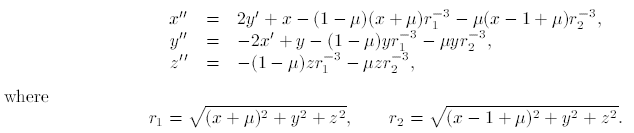

In [4]:
def X_ddot(t, X, mu):
    '''
    Returns the derivative of the state vector X
    ----------
    Arguments:
        t {float} -- time, in seconds
        X {np.array} -- state vector=(x, y, z, vx, vy, vz)
    ----------
    Returns:
        (6,1) np.array -- (xdot, ydot, zdot, vxdot, vydot, vzdot)
    '''
    
    # state variables
    x = X[0]
    y = X[1]
    z = X[2]
    x_dot = X[3]
    y_dot = X[4]
    z_dot = X[5]
    
    # initial conditions
    r_1 = np.sqrt((x+mu)**2 + y**2 + z**2)
    r_2 = np.sqrt((x-1+mu)**2 + y**2 + z**2)

    # equations of motion
    x_ddot = 2*y_dot + x - (1-mu)*(x+mu)/r_1**3 - mu*(x-1+mu)/r_2**3
    y_ddot = -2*x_dot + y - (1-mu)*y/r_1**3 - mu*y/r_2**3
    z_ddot = -(1-mu)*z/r_1**3 - mu*z/r_2**3
    
    x_dot_vec = X[3:]
    x_ddot_vec = np.array([x_ddot, y_ddot, z_ddot])
    X_dot_dot = np.concatenate((x_dot_vec, x_ddot_vec), axis=None)    
    
    return X_dot_dot

Integral of motion:

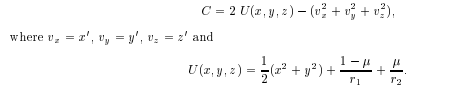

In [82]:
def Jacobi(x, mu):
    '''
    Returns the Jacobi constant for a given position vector
    '''
    
    r_1 = np.sqrt((x[0, -1]+mu)**2 + x[1, -1]**2 + x[2, -1]**2)
    r_2 = np.sqrt((x[0, -1]-1+mu)**2 + x[1, -1]**2 + x[2, -1]**2)

    U = 1/2*(np.linalg.norm(x[:2, -1])**2) + (1-mu)/r_1 + mu/r_2

    C = 2*U - np.linalg.norm(x[3:, -1])**2
    return C

## L1 family

Let's do the integration for the conditions below:

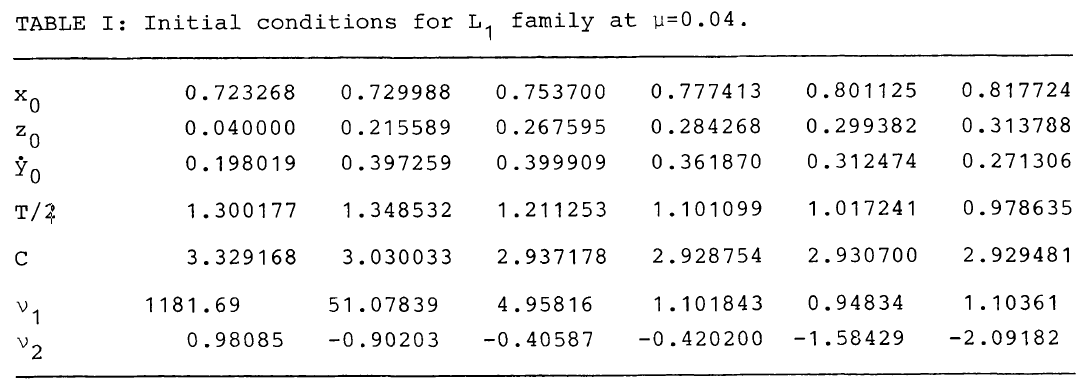

In [83]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.723268
y_0 = 0
z_0 = 0.04
x_dot_0 = 0
y_dot_0 = 0.198019
z_dot_0 = 0

mu = 0.04

T = 1.300177*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x, t = RK4(f, x0, tf, dt, mu, t0)

In [84]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.729988
y_0 = 0
z_0 = 0.215589
x_dot_0 = 0
y_dot_0 = 0.397259
z_dot_0 = 0

mu = 0.04

T = 1.348532*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x2, t2 = RK4(f, x0, tf, dt, mu, t0)

In [85]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.753700
y_0 = 0
z_0 = 0.267595
x_dot_0 = 0
y_dot_0 = 0.399909
z_dot_0 = 0

mu = 0.04

T = 1.211253*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x3, t3 = RK4(f, x0, tf, dt, mu, t0)

In [86]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.777413
y_0 = 0
z_0 = 0.284268
x_dot_0 = 0
y_dot_0 = 0.361870
z_dot_0 = 0

mu = 0.04

T = 1.101099*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x4, t4 = RK4(f, x0, tf, dt, mu, t0)

In [87]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.801125
y_0 = 0
z_0 = 0.299382
x_dot_0 = 0
y_dot_0 = 0.312474
z_dot_0 = 0

mu = 0.04

T = 1.017241*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x5, t5 = RK4(f, x0, tf, dt, mu, t0)

In [88]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.817724
y_0 = 0
z_0 = 0.313788
x_dot_0 = 0
y_dot_0 = 0.271306
z_dot_0 = 0

mu = 0.04

T = 0.978635*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x6, t6 = RK4(f, x0, tf, dt, mu, t0)

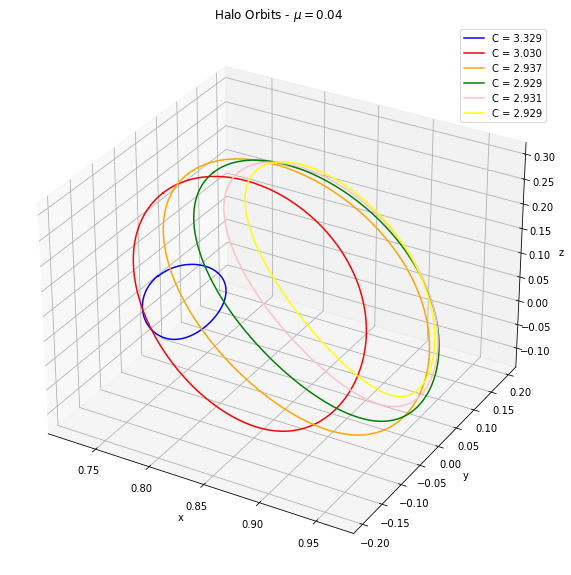

In [89]:
plt.figure(figsize=(15, 10))

ax = plt.axes(projection="3d")
ax.plot3D(x[0][:], x[1][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax.plot3D(x2[0][:], x2[1][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax.plot3D(x3[0][:], x3[1][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax.plot3D(x4[0][:], x4[1][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax.plot3D(x5[0][:], x5[1][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax.plot3D(x6[0][:], x6[1][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Halo Orbits - $\mu={mu}$")


plt.show()

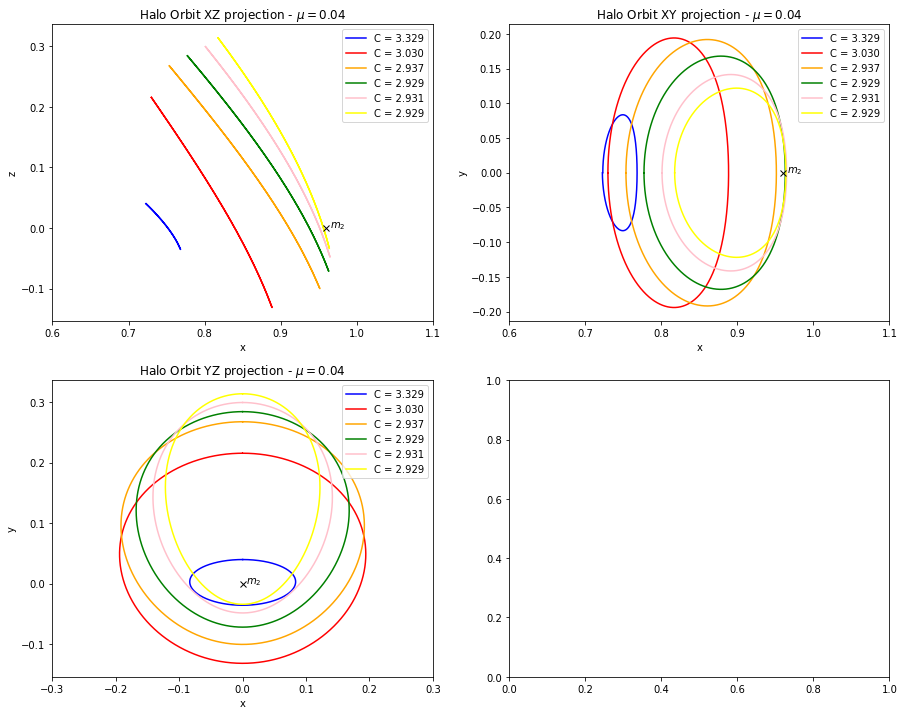

In [90]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))

## XZ Projection
ax.plot(x[0][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax.plot(x2[0][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax.plot(x3[0][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax.plot(x4[0][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax.plot(x5[0][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax.plot(x6[0][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax.plot([1-mu], [0], marker='x', color='black')
ax.text(1-mu+0.005 , 0, r'$m_2$')
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(0.6, 1.1)
ax.set_title(f"Halo Orbit XZ projection - $\mu={mu}$")

## XY Projection
ax2.plot(x[0][:], x[1][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax2.plot(x2[0][:], x2[1][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax2.plot(x3[0][:], x3[1][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax2.plot(x4[0][:], x4[1][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax2.plot(x5[0][:], x5[1][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax2.plot(x6[0][:], x6[1][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax2.plot([1-mu], [0], marker='x', color='black')
ax2.text(1-mu+0.005 , 0, r'$m_2$')
ax2.legend()

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(0.6, 1.1)
ax2.set_title(f"Halo Orbit XY projection - $\mu={mu}$")

## YZ Projection
ax3.plot(x[1][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax3.plot(x2[1][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax3.plot(x3[1][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax3.plot(x4[1][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax3.plot(x5[1][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax3.plot(x6[1][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax3.plot([0], [0], marker='x', color='black')
ax3.text(0.005 , 0, r'$m_2$')
ax3.legend()

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_xlim(-0.3, 0.3)
ax3.set_title(f"Halo Orbit YZ projection - $\mu={mu}$")


plt.show()

## L2 family


Let's do the integration for the conditions below:

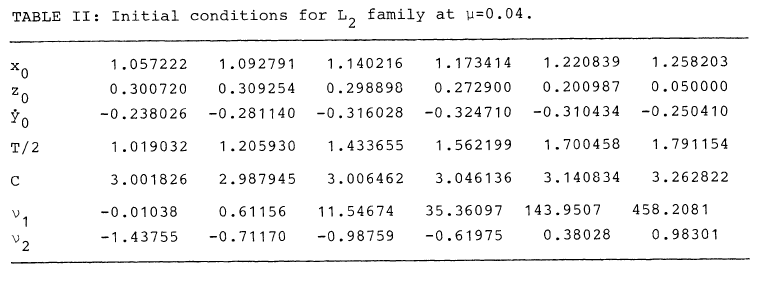

In [91]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.057222
y_0 = 0
z_0 = 0.300720
x_dot_0 = 0
y_dot_0 = -0.238026
z_dot_0 = 0

mu = 0.04

T = 1.019032*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x, t = RK4(f, x0, tf, dt, mu, t0)

In [92]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.092791
y_0 = 0
z_0 = 0.309254
x_dot_0 = 0
y_dot_0 = -0.281140
z_dot_0 = 0

mu = 0.04

T = 1.205930*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x2, t2 = RK4(f, x0, tf, dt, mu, t0)

In [93]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.140216
y_0 = 0
z_0 = 0.298898
x_dot_0 = 0
y_dot_0 = -0.316028
z_dot_0 = 0

mu = 0.04

T = 1.433655*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x3, t3 = RK4(f, x0, tf, dt, mu, t0)

In [94]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.173414
y_0 = 0
z_0 = 0.272900
x_dot_0 = 0
y_dot_0 = -0.324710
z_dot_0 = 0

mu = 0.04

T = 1.562199*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x4, t4 = RK4(f, x0, tf, dt, mu, t0)

In [95]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.2208
y_0 = 0
z_0 = 0.20098
x_dot_0 = 0
y_dot_0 = -0.310434
z_dot_0 = 0

mu = 0.04

T = 1.700458*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x5, t5 = RK4(f, x0, tf, dt, mu, t0)

In [96]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.258203
y_0 = 0
z_0 = 0.050000
x_dot_0 = 0
y_dot_0 = -0.250410
z_dot_0 = 0

mu = 0.04

T = 1.791154*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x6, t6 = RK4(f, x0, tf, dt, mu, t0)

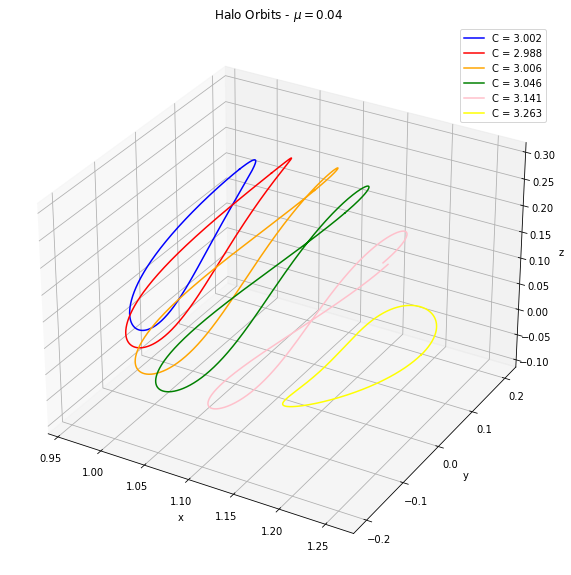

In [97]:
plt.figure(figsize=(15, 10))

ax = plt.axes(projection="3d")
ax.plot3D(x[0][:], x[1][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax.plot3D(x2[0][:], x2[1][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax.plot3D(x3[0][:], x3[1][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax.plot3D(x4[0][:], x4[1][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax.plot3D(x5[0][:], x5[1][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax.plot3D(x6[0][:], x6[1][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Halo Orbits - $\mu={mu}$")


plt.show()

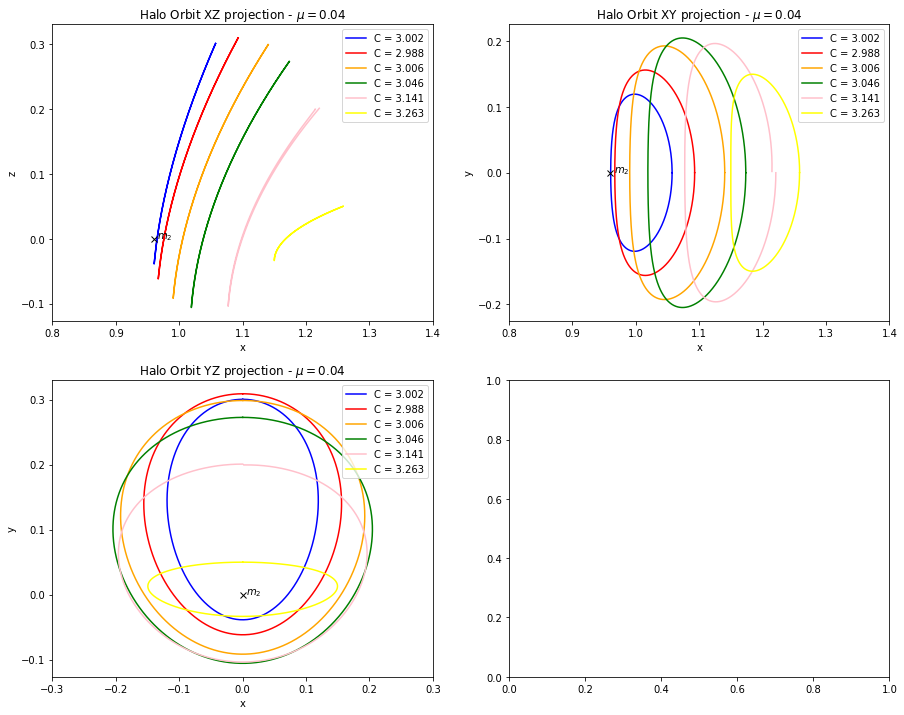

In [98]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))

## XZ Projection
ax.plot(x[0][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax.plot(x2[0][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax.plot(x3[0][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax.plot(x4[0][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax.plot(x5[0][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax.plot(x6[0][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax.plot([1-mu], [0], marker='x', color='black')
ax.text(1-mu+0.005 , 0, r'$m_2$')
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(0.8, 1.4)
ax.set_title(f"Halo Orbit XZ projection - $\mu={mu}$")

## XY Projection
ax2.plot(x[0][:], x[1][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax2.plot(x2[0][:], x2[1][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax2.plot(x3[0][:], x3[1][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax2.plot(x4[0][:], x4[1][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax2.plot(x5[0][:], x5[1][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax2.plot(x6[0][:], x6[1][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax2.plot([1-mu], [0], marker='x', color='black')
ax2.text(1-mu+0.005 , 0, r'$m_2$')
ax2.legend()

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(0.8, 1.4)
ax2.set_title(f"Halo Orbit XY projection - $\mu={mu}$")

## YZ Projection
ax3.plot(x[1][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax3.plot(x2[1][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax3.plot(x3[1][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax3.plot(x4[1][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax3.plot(x5[1][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax3.plot(x6[1][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax3.plot([0], [0], marker='x', color='black')
ax3.text(0.005 , 0, r'$m_2$')
ax3.legend()

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_xlim(-0.3, 0.3)
ax3.set_title(f"Halo Orbit YZ projection - $\mu={mu}$")


plt.show()

## L3 family

Let's do the integration for the conditions below:

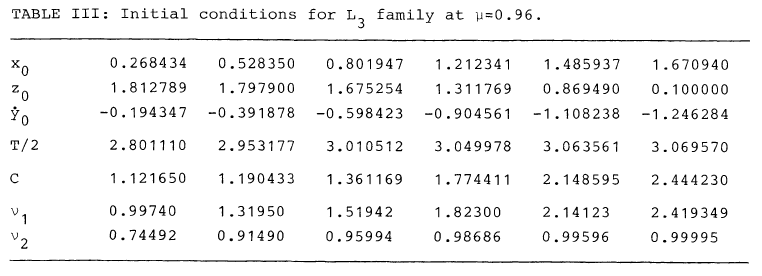

In [100]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.528350
y_0 = 0
z_0 = 1.797900
x_dot_0 = 0
y_dot_0 = -0.391878
z_dot_0 = 0

mu = 0.96

T = 2.953177*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x2, t2 = RK4(f, x0, tf, dt, mu, t0)

In [101]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 0.801947
y_0 = 0
z_0 = 1.675254
x_dot_0 = 0
y_dot_0 = -0.598423
z_dot_0 = 0

mu = 0.96

T = 3.010512*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x3, t3 = RK4(f, x0, tf, dt, mu, t0)

In [102]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.212341
y_0 = 0
z_0 = 1.311769
x_dot_0 = 0
y_dot_0 = -0.904561
z_dot_0 = 0

mu = 0.96

T = 3.049978*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x4, t4 = RK4(f, x0, tf, dt, mu, t0)

In [103]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.485937
y_0 = 0
z_0 = 0.869490
x_dot_0 = 0
y_dot_0 = -1.108238
z_dot_0 = 0

mu = 0.96

T = 3.063561*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x5, t5 = RK4(f, x0, tf, dt, mu, t0)

In [114]:
# Integrating the orbit using the functions RK4 and X_ddot

f = lambda t, X, mu: X_ddot(t, X, mu)

x_0 = 1.670940
y_0 = 0
z_0 = 0.100000
x_dot_0 = 0
y_dot_0 = -1.246284
z_dot_0 = 0

mu = 0.96

T = 3.069570*2

x0 = np.array((x_0, y_0, z_0, x_dot_0, y_dot_0, z_dot_0))
t0 = 0
tf = T
dt = T/2000

x6, t6 = RK4(f, x0, tf, dt, mu, t0)

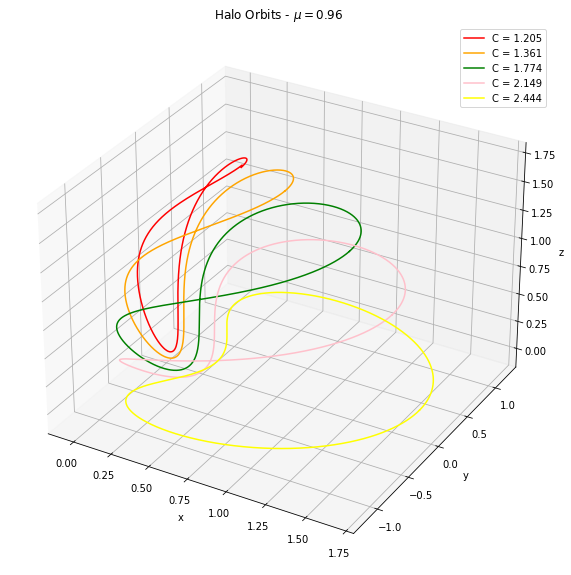

In [116]:
plt.figure(figsize=(15, 10))

ax = plt.axes(projection="3d")
#ax.plot3D(x[0][:], x[1][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax.plot3D(x2[0][:], x2[1][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax.plot3D(x3[0][:], x3[1][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax.plot3D(x4[0][:], x4[1][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax.plot3D(x5[0][:], x5[1][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax.plot3D(x6[0][:], x6[1][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Halo Orbits - $\mu={mu}$")


plt.show()

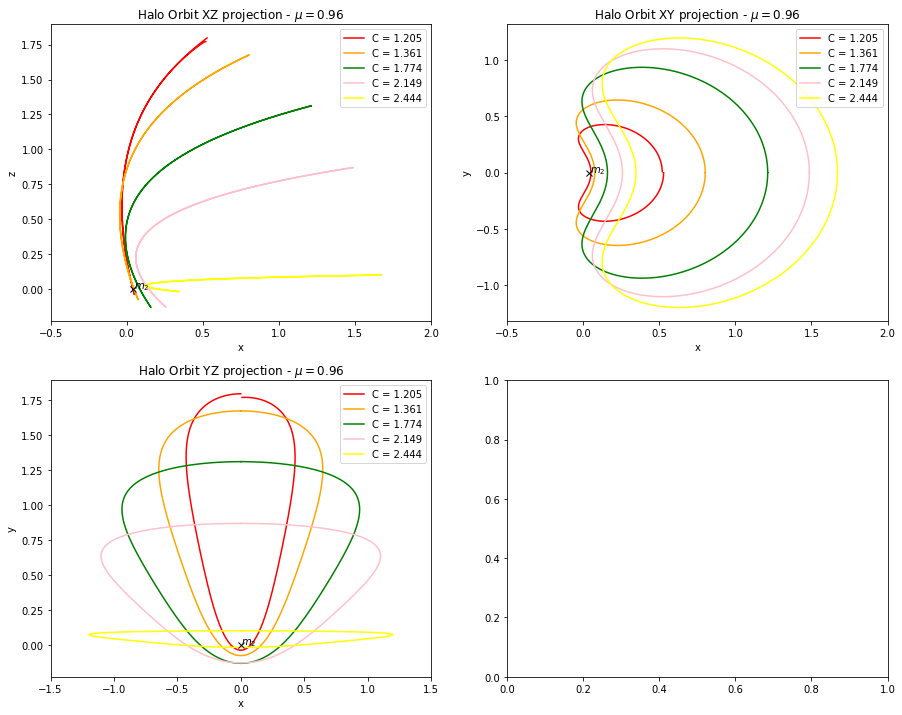

In [117]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))

## XZ Projection
#ax.plot(x[0][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax.plot(x2[0][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax.plot(x3[0][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax.plot(x4[0][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax.plot(x5[0][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax.plot(x6[0][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax.plot([1-mu], [0], marker='x', color='black')
ax.text(1-mu+0.005 , 0, r'$m_2$')
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-0.5, 2)
ax.set_title(f"Halo Orbit XZ projection - $\mu={mu}$")

## XY Projection
#ax2.plot(x[0][:], x[1][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax2.plot(x2[0][:], x2[1][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax2.plot(x3[0][:], x3[1][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax2.plot(x4[0][:], x4[1][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax2.plot(x5[0][:], x5[1][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax2.plot(x6[0][:], x6[1][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax2.plot([1-mu], [0], marker='x', color='black')
ax2.text(1-mu+0.005 , 0, r'$m_2$')
ax2.legend()

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(-0.5, 2)
ax2.set_title(f"Halo Orbit XY projection - $\mu={mu}$")

## YZ Projection
#ax3.plot(x[1][:], x[2][:], 'blue', label=f"C = {Jacobi(x, mu):.3f}")
ax3.plot(x2[1][:], x2[2][:], 'red', label=f"C = {Jacobi(x2, mu):.3f}")
ax3.plot(x3[1][:], x3[2][:], 'orange', label=f"C = {Jacobi(x3, mu):.3f}")
ax3.plot(x4[1][:], x4[2][:], 'green', label=f"C = {Jacobi(x4, mu):.3f}")
ax3.plot(x5[1][:], x5[2][:], 'pink', label=f"C = {Jacobi(x5, mu):.3f}")
ax3.plot(x6[1][:], x6[2][:], 'yellow', label=f"C = {Jacobi(x6, mu):.3f}")
ax3.plot([0], [0], marker='x', color='black')
ax3.text(0.005 , 0, r'$m_2$')
ax3.legend()

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_xlim(-1.5, 1.5)
ax3.set_title(f"Halo Orbit YZ projection - $\mu={mu}$")


plt.show()